## Visualisering og prediktiv analyse
### Om datasettet og utfordringer med manglende verdier


Vi analyserer to ulike datasett: værdata og luftkvalitetsmålinger. En utfordring i prosjektet er at luftkvalitetsdataene inneholder mange manglende verdier. Dette gjør det krevende å analysere sammenhenger, siden datagrunnlaget varierer i kvalitet og tetthet.

For å redusere feiltolkning, har vi diskutert hvordan ulike metoder for datarensing, som interpolasjon og glatting, påvirker hvordan trender fremstår visuelt. Særlig viktig er det å være bevisst at interpolasjon kan skjule naturlige variasjoner eller innføre kunstige mønstre i dataene.

### Tidsserievisualisering av NO₂-konsentrasjon


Vi startet med en enkel visualisering av NO₂-nivået i perioden 1. april til 31. mai. Denne grafen viser tydelig den daglige variasjonen og gir et godt bilde av datasettet over en kortere periode.

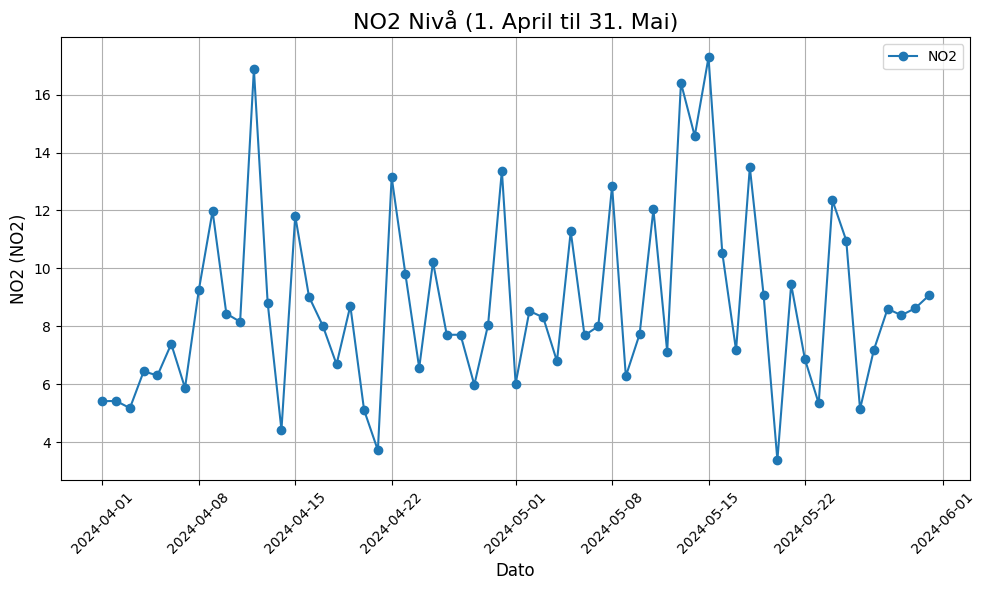

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

Luftdata = pd.read_json('../data/df1_data.json')

# bruker pivot_df filtrerer for dato område
Luftdata["date"] = pd.to_datetime(Luftdata["date"]) 
filtered_df = Luftdata[(Luftdata["date"] >= "2024-04-01") & (Luftdata["date"] <= "2024-05-31")]


# Velger variabel
variable = "NO2"

# Plotter
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["date"], filtered_df[variable], marker="o", label=variable)

# Pynter og justerer grafen
plt.title(f"{variable} Nivå (1. April til 31. Mai)", fontsize=16)
plt.xlabel("Dato", fontsize=12)
plt.ylabel(f"{variable} konsentrasjon (µg/m³)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()

### Faktisk NO₂-konsentrasjon sammenlignet med glidende gjennomsnitt over en lengere periode

For å analysere utviklingen av NO₂-nivåer over tid, har vi benyttet en 3-dagers rullende gjennomsnittslinje for å glatte ut de daglige variasjonene. Denne metoden reduserer støy og fremhever mulige trender som ellers kunne blitt skjult i et volatilt datamønster. Dette bidrar til å skape et tydeligere oversikt over en lengre perioder.

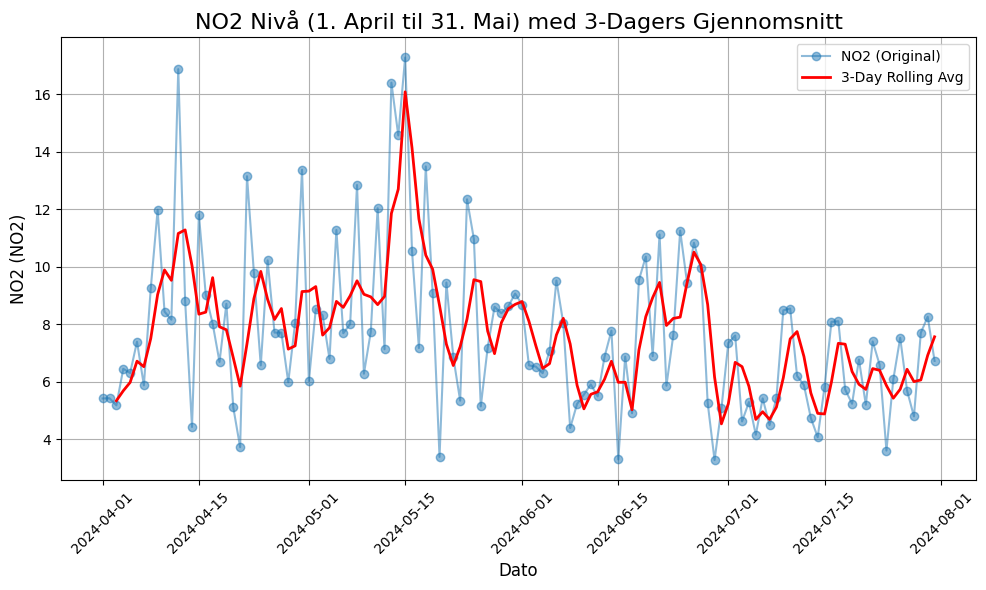

In [ ]:

filtered_df = Luftdata[(Luftdata["date"] >= "2024-04-01") & (Luftdata["date"] <= "2024-07-31")].copy()

variable = "NO2"

# Velger 3 dagers gjennomsnitt
avg_periode= 3
filtered_df.loc[:,f"{variable}_avg_periode"] = filtered_df[variable].rolling(window=avg_periode).mean()

# Opprinnelig data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df["date"], filtered_df[variable], marker="o", label=f"{variable} (Original)", alpha=0.5)

# Plotter 3 dagers gjennomsnitt
plt.plot(filtered_df["date"], filtered_df[f"{variable}_avg_periode"], color="red", label=f"{avg_periode}-Day Rolling Avg", linewidth=2)

# Pynter og justerer
plt.title(f"{variable} Nivå (1. April til 31. Mai) med {avg_periode}-Dagers Gjennomsnitt", fontsize=16)
plt.xlabel("Dato", fontsize=12)
plt.ylabel(f"{variable} konsentrasjon (µg/m³)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Glidende gjennomsnitt bidrar til å tydeliggjøre utviklingen over flere dager, men vi observerer fortsatt betydelig variabilitet i NO₂-nivåene. Det fremkommer ingen klar sesongmessig trend i denne perioden.

### NO₂-konsentrasjon for år 2020-2024 glidende gjennomsnitt

For å undersøke om det finnes gjennomgående mønstre, har vi i den neste visualisering sammenlignet data fra ulike år i ett diagram. Dette gjør det mulig å identifisere potensielle fellestrekk og sesongvariasjoner på tvers av år.

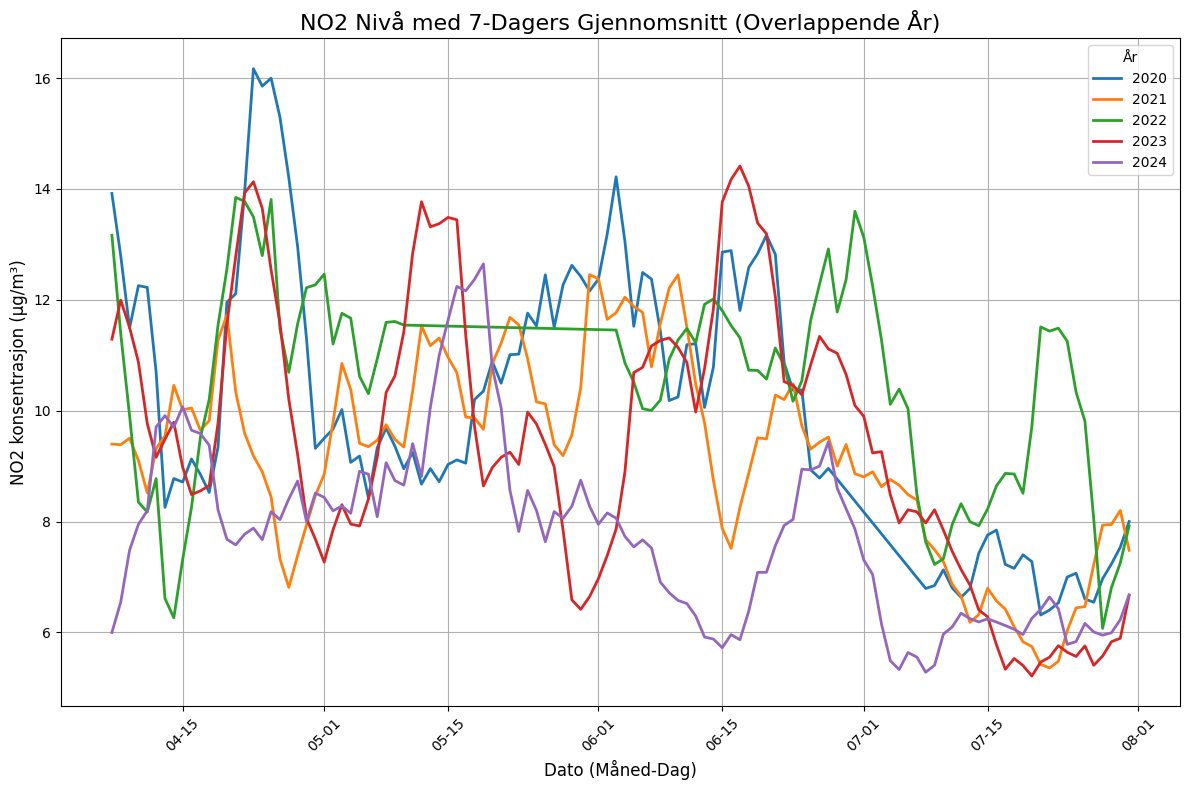

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Henter data fra fil
Luftdata = pd.read_json('../data/df1_fikset.json')

# Bytter til riktig datoformat
Luftdata["date"] = pd.to_datetime(Luftdata["date"])

# Få året
Luftdata["year"] = Luftdata["date"].dt.year

variable = "NO2"

# Gjennomsnittsvindu
avg_periode = 7

# Figur
plt.figure(figsize=(12, 8))

# Looper gjennom hvert år og lager gjennomsnitt
for year, group in Luftdata.groupby("year"):
    group = group.copy()
    group["date_aligned"] = group["date"].apply(lambda d: d.replace(year=2000))
    group[f"{variable}_avg_periode"] = group[variable].rolling(window=avg_periode).mean()
    plt.plot(group["date_aligned"], group[f"{variable}_avg_periode"], label=f"{year}", linewidth=2)

plt.title(f"{variable} Nivå med {avg_periode}-Dagers Gjennomsnitt (Overlappende År)", fontsize=16)
plt.xlabel("Dato", fontsize=12)
plt.ylabel(f"{variable} konsentrasjon (µg/m³)", fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # Only month and day
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="År")
plt.tight_layout()
plt.show()

Vi observerer at manglende data kan skape utfordringer for visualiseringene, særlig for enkelte år. For eksempel viser den grønne grafen for år 2022 en periode med tilnærmet konstant temperatur i juli og juni, noe som skyldes at vi fylte inn manglende verdier ved å bruke 1. grads interpolasjon. Dette innebærer at verdiene mellom to kjente datapunkter blir estimert som en lineær linje, som fører til en kunstig jevn strekning i grafen, uten den naturlige variasjonen som normalt i temperaturdata.

Likevel er det mulig å trekke ut noe innsikt fra grafen. Vi ser antydninger til at NO₂-konsentrasjonen synker i midten av juli, og en lignende trend oppstår litt senere i 2022. Samtidig er det viktig å være klar over at disse trendene ikke er veldig tydelige, og at glatting med 7-dagers rullende gjennomsnitt kan skjule den høye volatiliteten i de daglige målingene.

### Gjennomsnittlig lufttemperatur med glidende gjennomsnitt

For å sammenligne med en mer stabil variabel, ser vi også på temperatur, som forventes å følge en jevnere og mer forutsigbar utvikling i løpet av vår- og sommermånedene. Ved å bruke samme visualiseringsmetode med årene lagt oppå hverandre og en glattet trendlinje, får vi et bedre inntrykk av temperaturutviklingen på tvers av år.

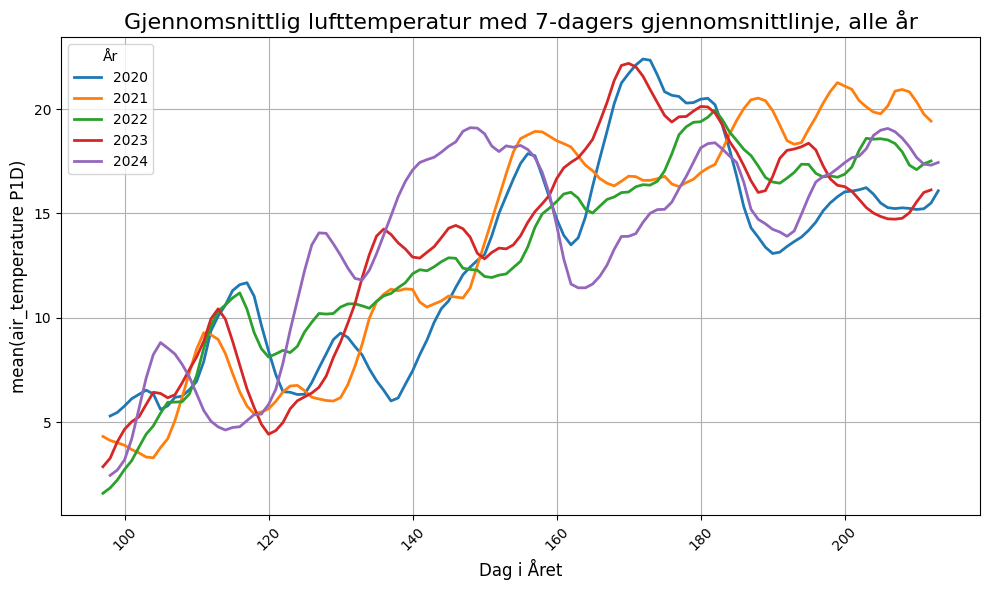

In [19]:
# Henter data fra "df2_data" som inneholder værdata
Værdata=pd.read_json('../data/df2_data.json')

Værdata["date"] = pd.to_datetime(Værdata["referenceTime"],unit='ms')

Værdata["year"] = Værdata["date"].dt.year

variable="mean(air_temperature P1D)"

avg_periode=7

plt.figure(figsize=(10, 6))

for year, group in Værdata.groupby("year"):
    group = group.copy()
    group["day_of_year"] = group["date"].dt.day_of_year  # får datoene til å samsvare gjennom årene
    group[f"{variable}_avg_periode"] = group[variable].rolling(window=avg_periode).mean()
    
    # Plotter gjennomsnitt
    plt.plot(group["day_of_year"], group[f"{variable}_avg_periode"], label=f"{year}", linewidth=2)


plt.title("Gjennomsnittlig lufttemperatur med 7-dagers gjennomsnittlinje, alle år", fontsize=16)
plt.xlabel("Dag i Året", fontsize=12)
plt.ylabel(variable, fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="År")


plt.tight_layout()
plt.show()



Denne typen visualisering egner seg spesielt godt for temperaturdata, ettersom temperatur følger en mer kontinuerlig og sesongavhengig utvikling sammenlignet med NO₂-konsentrasjon. Vi ser tydelige og relativt ensartede trender på tvers av årene, noe som bekrefter at lufttemperaturen har en forutsigbar stigning utover våren og sommeren. Slike jevne mønstre gjør temperatur til en egnet variabel for denne formen for sammenligning.

### Forhold mellom NO2 og vindhastighet

I neste del benytter vi scatterplots for å undersøke sammenhengen mellom to ulike variabler. Til tross for at enkelte datasett kan ha høy variasjon, gir scatterplots et ryddig bilde av den underliggende relasjonen. Ved å legge til en regresjonslinje (best fit line), kan vi enkelt vurdere styrken og retningen på korrelasjonen mellom variablene.

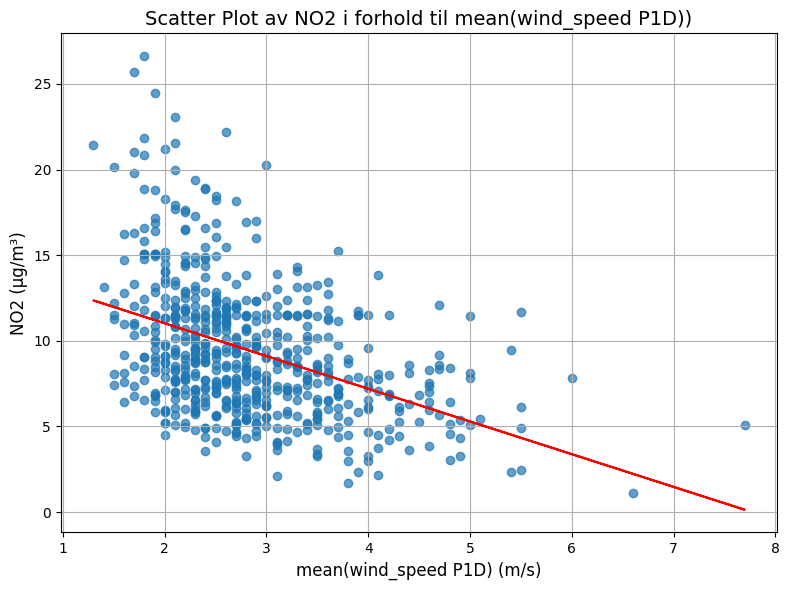

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Henter data
df1 = pd.read_json('../data/df1_fikset.json')
df2 = pd.read_json('../data/df2_data.json')

# Konverterer dato til riktig format
df1['date'] = pd.to_datetime(df1['date'], unit='ms')
df2['referenceTime'] = pd.to_datetime(df2['referenceTime'], unit='ms')

# Merger datasets
merged_df = pd.merge(df1, df2, left_on='date', right_on='referenceTime')

# Henter år for gruppering
merged_df['year'] = merged_df['date'].dt.year

# Variabler
x_variable = 'mean(wind_speed P1D)'  # Fra df2_data.json
y_variable = 'NO2'  # Fra df1_data.json

# Plotter
plt.figure(figsize=(8, 6))
scatter=plt.scatter(merged_df[x_variable], merged_df[y_variable], alpha=0.7)

    # Legger til best fit line 
if not merged_df[x_variable].isnull().any() and not merged_df[y_variable].isnull().any():
    slope, intercept = np.polyfit(merged_df[x_variable], merged_df[y_variable], 1)
    best_fit_line = slope * merged_df[x_variable] + intercept
    plt.plot(merged_df[x_variable], best_fit_line, color='red', label='Best Fit Line')
    
    plt.title(f'Scatter Plot av {y_variable} i forhold til {x_variable})', fontsize=14)
    plt.xlabel(x_variable+" (m/s)", fontsize=12)
    plt.ylabel(y_variable+" (\u00b5g/m\u00b3)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Scatterplottet viser daglige observasjoner av NO₂-konsentrasjon i forhold til gjennomsnittlig vindhastighet, aggregert på tvers av år. Det observeres tydelig negativ korrelasjon mellom vindhastighet og NO₂-konsentrasjon. Denne sammenhengen indikerer at høy vindhastighet har en reduserende effekt på lokale NO₂-nivåer, sannsynligvis som følge av økt spredning av forurensningen.

Den røde regresjonslinjen støtter denne antakelsen. Til tross for noe spredning i datapunktene, underbygger linjen sammenhengen mellom variablene. For tydeligere fremstilling kan mer avanserte visualiseringsverktøy som seaborn benyttes, ettersom de gir et mer presist og lesbart uttrykk av både datapunkter og regresjonslinjer.

### Forhold mellom NO2 og vindhastighet seaborn


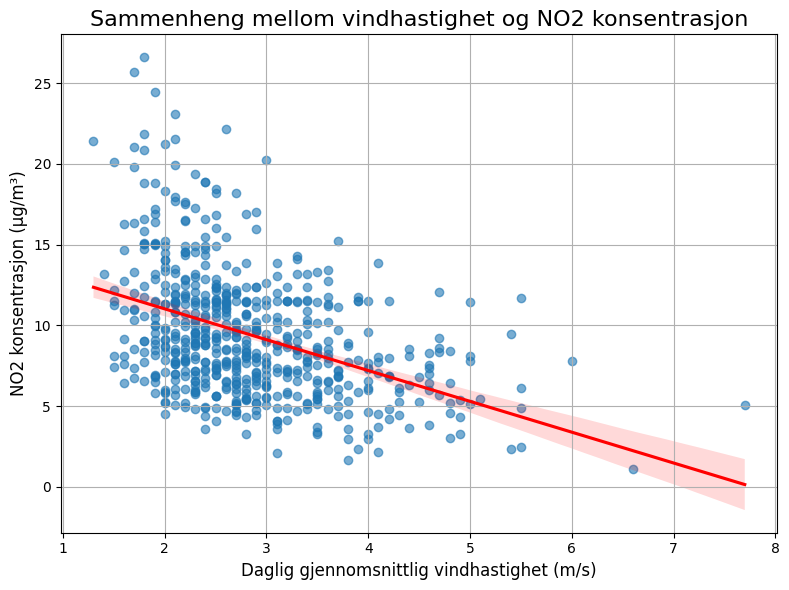

In [26]:
# Scatterplot med regresjonslinje
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(data=merged_df, x='mean(wind_speed P1D)', y='NO2', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Sammenheng mellom vindhastighet og NO2 konsentrasjon', fontsize=16)
plt.xlabel('Daglig gjennomsnittlig vindhastighet (m/s)', fontsize=12)
plt.ylabel('NO2 konsentrasjon (\u00b5g/m\u00b3)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Hittil har vi kun sett på korrelasjon/sammenheng mellom én værfaktor og én luftvariabel. For å kunne velge hvilke faktorer som er best for å trene opp en modell må vi se sammenhenger i helhet. 

Først kan vi lage et diagram med seaborn som viser korrelasjon mellom alle variablene: 

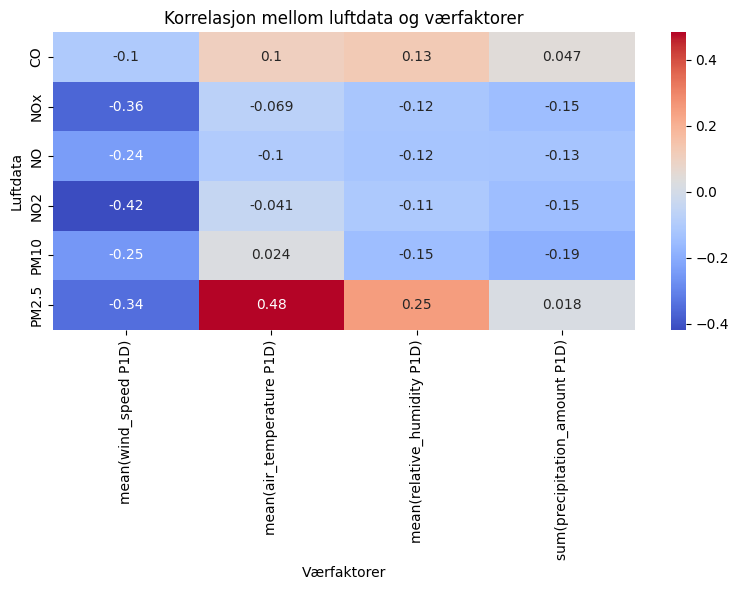

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Velger kolonner for værdata og luftdata for å sammenligne
air_columns = ['CO', 'NOx', 'NO', 'NO2', 'PM10', 'PM2.5']  # Eksempel, bruk de som finnes i df1_data
weather_columns = ['mean(wind_speed P1D)', 'mean(air_temperature P1D)', 'mean(relative_humidity P1D)', 'sum(precipitation_amount P1D)']  # Eksempel, bruk de som finnes i df2_data

# Lager korrelasjonsmatrise mellom kolonnene
corr = merged_df[air_columns + weather_columns].corr().loc[air_columns, weather_columns]

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korrelasjon mellom luftdata og værfaktorer')
plt.xlabel('Værfaktorer')
plt.ylabel('Luftdata')
plt.tight_layout()
plt.show()

Her er det mye lettere å se hvilke faktorer/variabler har størst korrelasjon. 

Vi kan se herifra at vind har en svak/middels negativ korrelasjon til alle luftkonsentrasjonene utenom CO. Dette kan forklares ved at vinden vil blåse vekk partikler og hindre at de samler seg i større mengder til en viss grad. 

Det som er mest merkverdig her er nok korrelasjonen mellom temperatur og PM2.5 konsentrasjon, som er mye sterkere enn alle andre sammenhenger. 

Fra dette kan vi se at ingen av værfaktorene har en sterk korrelasjon til luftkvaliteten (korrelasjon over 0.5 eller under -0.5), men at det er enkelte sammenhenger der vi ser en middels korrelasjon som mellom temperatur og PM2.5 og mellom NO2 og vindhastighet. 

<Axes: >

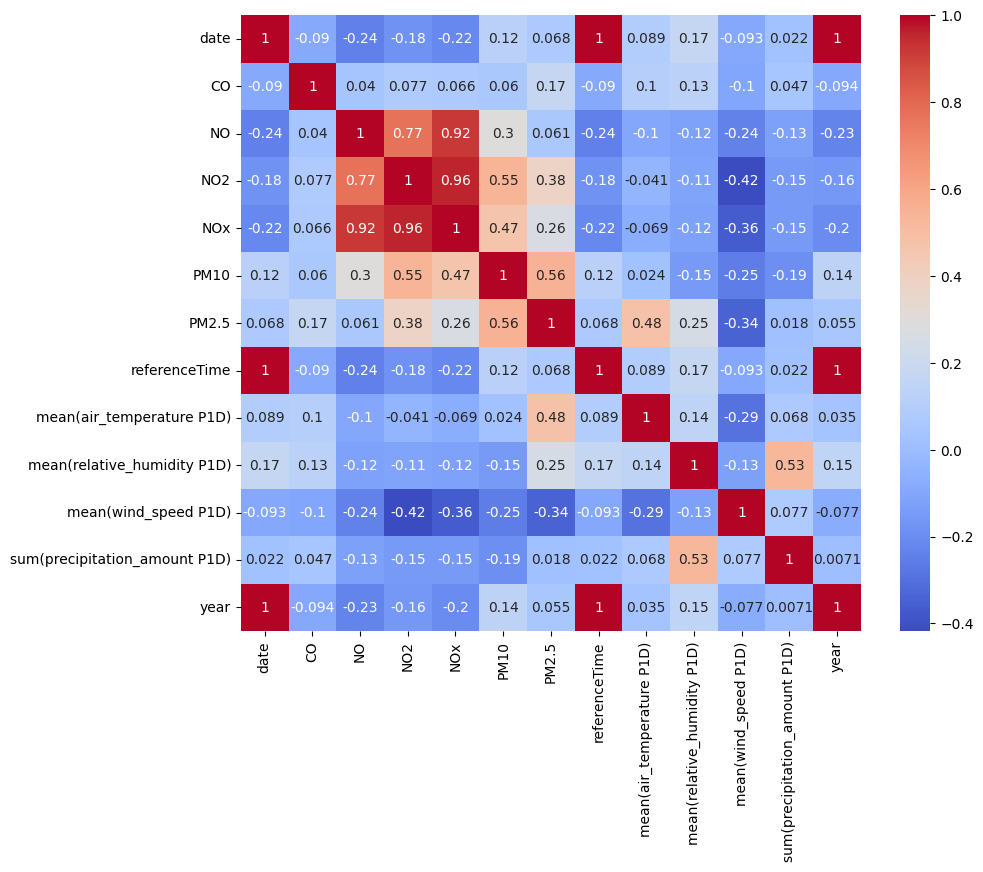

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = merged_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')